In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-05-24 13:09:36--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.02s   

2020-05-24 13:09:36 (1.59 MB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [4]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
#how many of each class
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad28d35048>]],
      dtype=object)

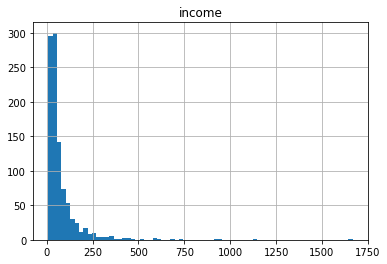

In [8]:
df.hist(column='income', bins=70)

In [0]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']]

In [0]:
Y = df['custcat']

In [0]:
# this is how to use standard scalar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit(X).transform(X)

In [0]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [21]:
# checking shape of training and test set
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (700, 11) (700,)
Test set: (300, 11) (300,)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
#checking which k will be suitable for me to use
error_rate = []
for k in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  pred_k = knn.predict(X_test)
  error_rate.append(np.mean(pred_k != y_test))

Text(0, 0.5, 'Error rate')

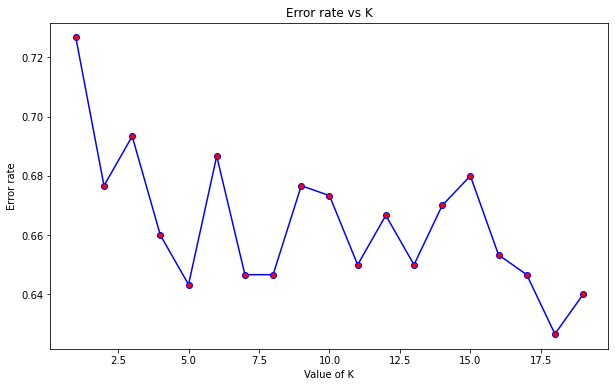

In [37]:
#plotting error rate vs k_value
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue',marker='o',markerfacecolor='red')
plt.title("Error rate vs K")
plt.xlabel("Value of K")
plt.ylabel("Error rate")

In [0]:
# error is lowest at k = 18-19 , which means accuracy will be higher at this value of k

In [0]:
#fitting and predict with k =18
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.34      0.50      0.40        76
           2       0.30      0.22      0.25        69
           3       0.39      0.45      0.42        77
           4       0.49      0.31      0.38        78

    accuracy                           0.37       300
   macro avg       0.38      0.37      0.36       300
weighted avg       0.38      0.37      0.37       300



In [55]:
print(accuracy_score(y_test, pred))

0.37333333333333335


In [0]:
#the accuracy is kinda lower i.e only 0.37 but it's because of the dataset. 
#this dataset isn't suitable for knn algo. I'll be trying other classification algorithms like decision trees,logistic,svm